In [1]:
! python --version

Python 3.10.8


In [2]:
! pip install diffusers transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.3/764.3 kB 3.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.9 MB/s eta 0:00:0000:0100:01


In [3]:
! pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [4]:
from diffusers import StableDiffusionPipeline
import torch

2023-03-22 23:06:40.587471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 23:06:43.048171: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-22 23:06:49.562948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-22 23:06:49.563206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [5]:
model_id = "dreamlike-art/dreamlike-diffusion-1.0"

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [7]:
pipe.config

FrozenDict([('vae', ('diffusers', 'AutoencoderKL')),
            ('text_encoder', ('transformers', 'CLIPTextModel')),
            ('tokenizer', ('transformers', 'CLIPTokenizer')),
            ('unet', ('diffusers', 'UNet2DConditionModel')),
            ('scheduler', ('diffusers', 'DDIMScheduler')),
            ('safety_checker', (None, None)),
            ('feature_extractor', (None, None)),
            ('requires_safety_checker', None)])

In [8]:
pipe = pipe.to("cuda")

In [9]:
images = pipe(
    prompt = "(((forrest gump))) flying on the , light blue atmosphere, hdr, cinematic",
    height = 512,
    width = 1024,
    num_inference_steps = 100,
    guidance_scale = 0.5,
    num_images_per_prompt = 1
).images

  0%|          | 0/100 [00:00<?, ?it/s]

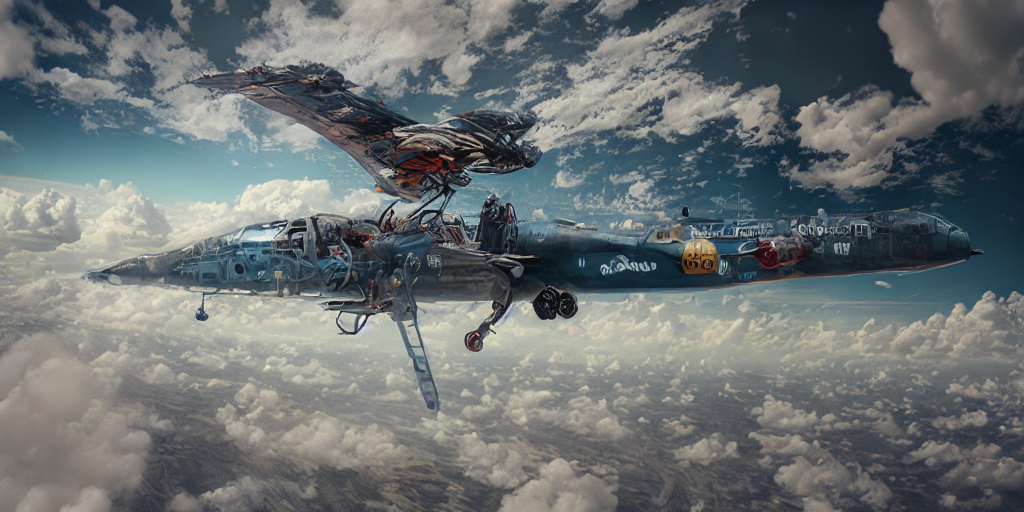

In [10]:
display(images[0])